In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

mnist_path = '/media/ronit/04101CEC101CE708/UCSD Spring 2017/CSE 291/Homework2/train.csv'
mnist_df = pd.read_csv(mnist_path, header=None)

In [3]:
mnist_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42000,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_df=mnist_df.rename(index=int, columns={0: "class"})

In [5]:
mnist_df.tail()

,class,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42000,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
a=mnist_df['class']

In [7]:
del mnist_df['class']

In [8]:
mnist_df.insert(784,'class',a)

In [9]:
mnist_df.tail()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,class
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
41999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
42000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [10]:
mnist_df = mnist_df.ix[1:]

In [11]:
mnist=mnist_df.as_matrix()

In [12]:
mnist.shape

(42000, 785)

In [13]:
mnist[:5]

array([['0', '0', '0', ..., '0', '0', '1'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '1'],
       ['0', '0', '0', ..., '0', '0', '4'],
       ['0', '0', '0', ..., '0', '0', '0']], dtype=object)

In [14]:
#mnist_train_X=mnist[0:32000,0:784]
#mnist_train_Y=mnist[0:32000,784]
#mnist_test_X=mnist[32000:,0:784]
#mnist_test_Y=mnist[32000:,784]


In [14]:
from sklearn.model_selection import train_test_split
mnist_train_X, mnist_test_X,mnist_train_Y, mnist_test_Y = train_test_split(mnist[:,0:784],mnist[:,784], test_size=0.25, random_state=42)

In [15]:
mnist_train_X.shape

(31500, 784)

In [16]:
mnist_train_X=mnist_train_X.astype(int)
mnist_train_Y=mnist_train_Y.astype(int)
mnist_test_X=mnist_test_X.astype(int)
mnist_test_Y=mnist_test_Y.astype(int)

In [17]:
covariance=np.cov((mnist_train_X).T)

In [18]:
covariance.shape

(784, 784)

In [19]:
from numpy import linalg as LA
eig_val, eig_vec = LA.eig(covariance)

In [20]:
eig_vec=np.real(eig_vec)
eig_val=np.real(eig_val)

In [21]:
sorted_eig_val=np.sort(eig_val)[::-1]
index_sorted_eig_val=np.argsort(eig_val)[::-1]

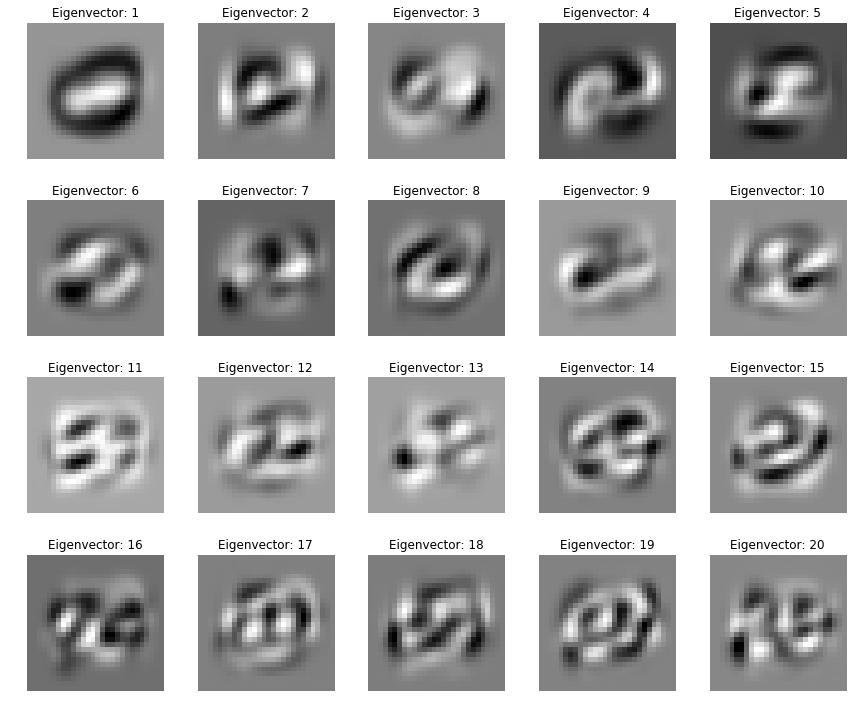

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
for i in range(20):
    example = eig_vec[:,index_sorted_eig_val[i]].reshape(28, 28).T
    plt.subplot(4, 5, i+1)
    plt.imshow(example, cmap='gray')
    plt.title("Eigenvector: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()
plt.show()

In [22]:
cumilative_sorted_eig_val=np.cumsum(sorted_eig_val)
norm_cumilative_sorted_eig_val=cumilative_sorted_eig_val/(max(cumilative_sorted_eig_val))

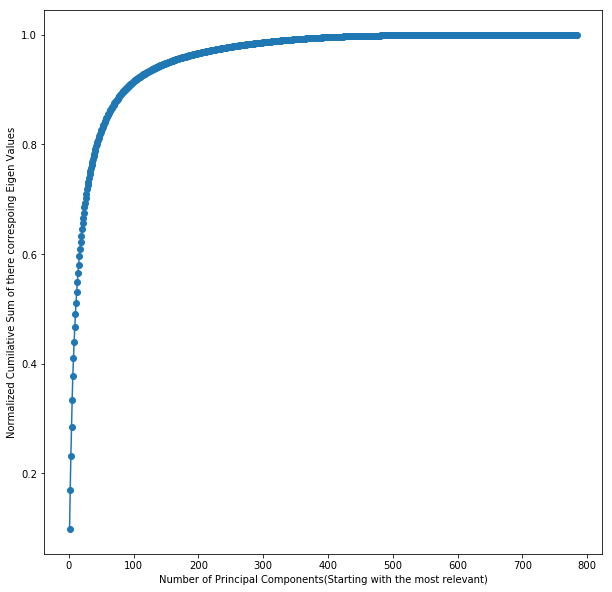

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(range(1,len(norm_cumilative_sorted_eig_val)+1), norm_cumilative_sorted_eig_val,marker='o')
plt.xlabel('Number of Principal Components(Starting with the most relevant)')
plt.ylabel('Normalized Cumilative Sum of there correspoing Eigen Values')
plt.show()

In [23]:
pca_components=eig_vec[:,index_sorted_eig_val[0]]
for i in range(len(eig_val)-1):
    pca_components=np.column_stack((pca_components,eig_vec[:,index_sorted_eig_val[i+1]]))

In [24]:
pca_components.shape

(784, 784)

In [25]:
#number_of_PCA_components
n=90;
mnist_train_X_mean=(mnist_train_X.T).mean(1)
temp=np.array([(mnist_train_X[i,:].T-mnist_train_X_mean) for i in range(len(mnist_train_X))])
mnist_train_X_classifier=temp.dot(pca_components[:,0:n])

In [26]:
mnist_train_X_classifier.shape

(31500, 90)

In [27]:
mnist_test_X_mean=(mnist_test_X.T).mean(1)
temp=np.array([(mnist_test_X[i,:].T-mnist_test_X_mean) for i in range(len(mnist_test_X))])
mnist_test_X_classifier=temp.dot(pca_components[:,0:n])

In [28]:
mnist_test_X_classifier.shape

(10500, 90)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
from sklearn.utils import resample
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy import stats

In [30]:
X={}
y={}
data_index={}
for i in [50,75,100]:
    data_index[i]=np.random.random_integers(0,len(mnist_train_X_classifier)-1, size=int((i/100)*len(mnist_train_X_classifier)))
    X[i]=mnist_train_X_classifier[data_index[i],:]
    y[i]=mnist_train_Y[data_index[i]]
    

In [31]:
len(y[50])

15750

In [32]:
from sklearn.neighbors import KNeighborsClassifier


In [33]:
sco_final={}
for i in [50,75,100]:
    sco=defaultdict(list)
    for k in range(1,11):
        neigh = KNeighborsClassifier(n_neighbors=k*5)
        for n_folds in [2,5]:
            cv = KFold(n_splits=n_folds)
            sc = cross_val_score(neigh,X[i],y[i],cv=cv)
            sco[k*5].append(sc.mean())
        print('k=  ',k*5,'  i=  ',i)    
    sco_final[i]=sco

k=   1   i=   50
k=   2   i=   50
k=   3   i=   50
k=   4   i=   50
k=   5   i=   50
k=   6   i=   50
k=   7   i=   50
k=   8   i=   50
k=   9   i=   50
k=   10   i=   50
k=   11   i=   50
k=   12   i=   50
k=   13   i=   50
k=   14   i=   50
k=   15   i=   50
k=   16   i=   50
k=   17   i=   50
k=   18   i=   50
k=   19   i=   50
k=   20   i=   50


KeyboardInterrupt: 

In [33]:
covariance=np.cov((mnist_train_X_classifier).T)

In [34]:
covariance.shape

(90, 90)

In [ ]:
from sklearn.neighbors import DistanceMetric
sco_final_mah={}
for i in [50,75,100]:
    sco=defaultdict(list)
    for k in range(1,11):
        neigh = KNeighborsClassifier(algorithm ='ball_tree',n_neighbors=k*5,metric='mahalanobis',metric_params={"V":covariance})
        for n_folds in [2,5]:
            cv = KFold(n_splits=n_folds)
            sc = cross_val_score(neigh,X[i],y[i],cv=cv)
            sco[k*5].append(sc.mean())
        print('k=  ',k*5,'  i=  ',i)    
    sco_final_mah[i]=sco